In [38]:
#K Means algorithm is unsupervised machine learning technique used to cluster data points.For this technique I have taken 
#income data in which clustering is done on people income based on Age.

In [39]:
##K-means clustering

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv('C:/Users/admin/Downloads/Income.csv')

In [96]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [97]:
df.shape

(22, 3)

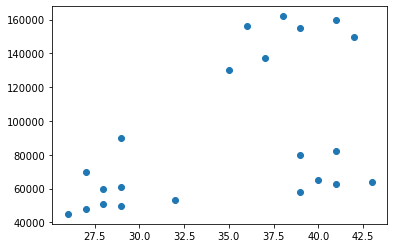

In [99]:
plt.scatter(df['Age'],df['Income($)'])

In [100]:
# from scatter plot we see that there are 3 clusters so we choose K=3

In [129]:
# scree plot
mylist=[]
for i in range (1,10):
    result=KMeans(n_clusters=i)
    result.fit(df[['Age','Income($)']])
    mylist.append(result.inertia_)
mylist    

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2776818715436998,
 0.22020960864009395,
 0.18752738899206237,
 0.1408795172510311,
 0.11073569527418643]

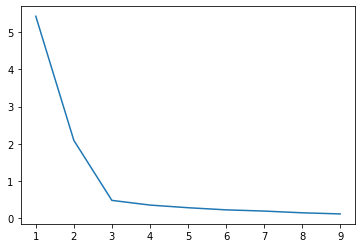

In [130]:
plt.plot(range(1,10),mylist)# hense from scree plot K must be equal to 3

In [101]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [102]:
#fit and predict the model using fit_predict  
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [104]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


[]

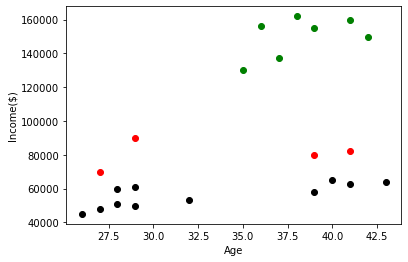

In [110]:
#visualising clusters
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.plot()

In [111]:
# there for cluster 1 is grouped properly but there is problem in grouping 2nd and 3rd cluster this happend due to our narroe labelling 
#of x axis to overcome this we to use the minmaxscaler from preprocessing. 

In [120]:
#fitting and transform minmaxscaler
scaler= MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [123]:
#again fitting and predicting model
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [124]:
df['cluster']=y_predicted


In [125]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


[]

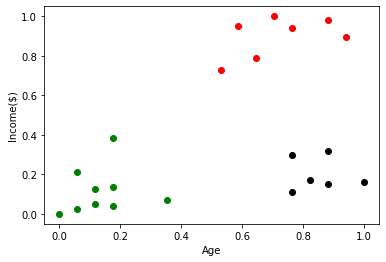

In [126]:
#visualising clusters
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.plot()

In [132]:
mycluster= df[df['cluster']==0]['Age']
mycluster

0     0.058824
1     0.176471
2     0.176471
3     0.117647
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
Name: Age, dtype: float64

In [140]:
mycluster= df[df['cluster']==1]['Age']
mycluster

4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
Name: Age, dtype: float64

In [134]:
mycluster= df[df['cluster']==2]['Age']
mycluster

16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [ ]:
#RESULT__3 clusters of people Income are grouped on the basis of their Age. 